#                                      Boardgames Data Analysis

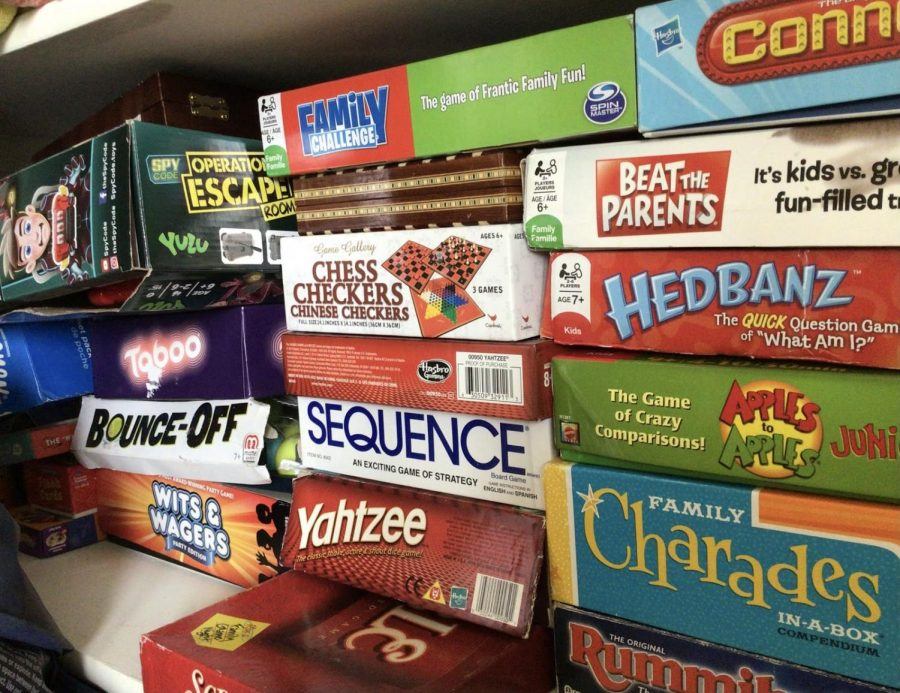

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

###########################################################################################################################

## Loading data and Initial EDA:

- Renamed few columns for clarity.
- Displaying column names and first few rows of the data.


In [2]:
brdg_df = pd.read_csv('boardgames1.csv')

In [3]:
brdg_df.columns = brdg_df.columns.str.replace('baverage','geek_rating')
brdg_df.columns = brdg_df.columns.str.replace('average','average_rating')
brdg_df.columns = brdg_df.columns.str.replace('boardgamehonor_cnt','award_counts')
brdg_df.columns = brdg_df.columns.str.replace('news','BGG_news')
brdg_df.columns = brdg_df.columns.str.replace('blogs','BGG_blogs')

In [4]:
brdg_df.columns

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average_rating', 'geek_rating', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'BGG_news', 'BGG_blogs',
       'weblink', 'podcast', 'label', 'boardgamedesigner_cnt',
       'boardgameartist_cnt', 'boardgamepublisher_cnt', 'award_counts',
       'boardgamecategory_cnt', 'boardgamemechanic_cnt',
       'boardgameexpansion_cnt', 'boardgameversion_cnt', 'boardgamefamily_cnt',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher',
       'boardgamehonor', 'boardgamecategory', 'boardgameversion',
       'boardgamemechanic', 'boardgameexpansion', 'boardgamefamily',
       'description', 'gamelink'],
      dtype='object')

In [5]:
#brdg_df.head(10)

In [6]:
brdg_df['min_community'] = brdg_df['min_community'].fillna(brdg_df['min_community'].mean())
brdg_df['max_community'] = brdg_df['max_community'].fillna(brdg_df['max_community'].mean())

In [7]:
#brdg_df.isnull().sum()

In [8]:
#brdg_df.describe()

In [9]:
#brdg_df.corr()

In [10]:
brdg_df['geek_rating_category'] = brdg_df['geek_rating']\
            .apply(lambda x: 'Geek_Rating > 7' if x >=7\
                   else 'Geek rating > 6 and < 7' if x<7 and x>=6\
                   else 'Geek rating > 5 and < 6' if x<6 and x>=5\
                   else 'Geek rating < 5')

In [11]:
brdg_df['geek_rating_category'].value_counts(normalize=True)

Geek rating > 5 and < 6    0.81125
Geek rating > 6 and < 7    0.09885
Geek rating < 5            0.07160
Geek_Rating > 7            0.01830
Name: geek_rating_category, dtype: float64

In [ ]:
brdg_df['site_views_category'] = brdg_df['siteviews']\
            .apply(lambda x: 'Geek_Rating > 7' if x >=7\
                   else 'Geek rating > 6 and < 7' if x<7 and x>=6\
                   else 'Geek rating > 5 and < 6' if x<6 and x>=5\
                   else 'Geek rating < 5')

###########################################################################################################################

## Evaluating geek ratings for all games:

Text(0, 0.5, 'Density')

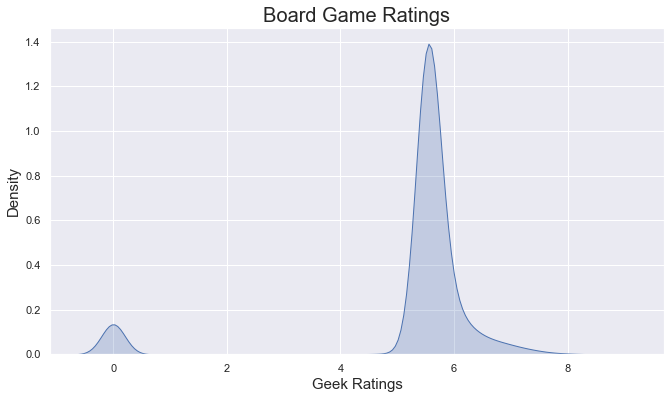

In [12]:
sns.set(rc={"figure.figsize":(11, 6)})
sns.kdeplot(brdg_df['geek_rating'], shade = True).set_title('Board Game Ratings',fontsize = 20)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

Text(0.5, 1.0, 'Histogram of Geek Ratings')

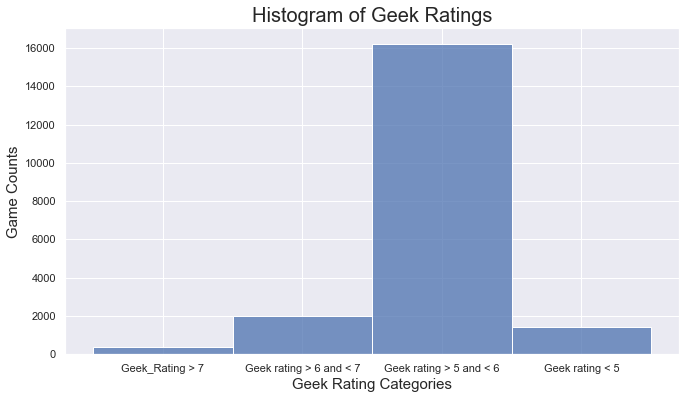

In [13]:
sns.histplot(brdg_df['geek_rating_category'])
plt.xlabel('Geek Rating Categories',fontsize = 15)
plt.ylabel('Game Counts',fontsize = 15)
plt.title('Histogram of Geek Ratings', fontsize = 20)

###########################################################################################################################

### Evaluation of 150 highest rated boardgames and site views:

- Top 100 boardgames siteviews are compared with their board game ratings


In [14]:
rating_views_top = brdg_df[['name','geek_rating',"siteviews"]]\
        .sort_values('geek_rating',ascending=False).head(150)
rating_views_top

,name,geek_rating,siteviews
0,Gloomhaven,8.58424,8933078
1,Pandemic Legacy Season 1,8.47159,2971746
2,Terraforming Mars,8.26781,4724387
3,Through the Ages A New Story of Civilization,8.23513,2448074
4,Brass Birmingham,8.20459,894621
...,...,...,...
144,\u062c\u0648\u0627\u0647\u0631\u064a,7.35206,1730330
145,Goa A New Expedition,7.34947,873752
146,Tichu,7.34824,802488
147,Detective A Modern Crime Board Game,7.34381,490214


In [15]:
rating_views_top.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,7.624845,1.661943e+06
std,0.254136,1.228917e+06
min,7.342780,2.738540e+05
25%,7.426147,8.451090e+05
50%,7.556870,1.255121e+06
75%,7.768045,2.044964e+06
max,8.584240,8.933078e+06


In [16]:
rating_views_top.corr()

,geek_rating,siteviews
geek_rating,1.00000,0.60716
siteviews,0.60716,1.00000


Text(0, 0.5, 'Density')

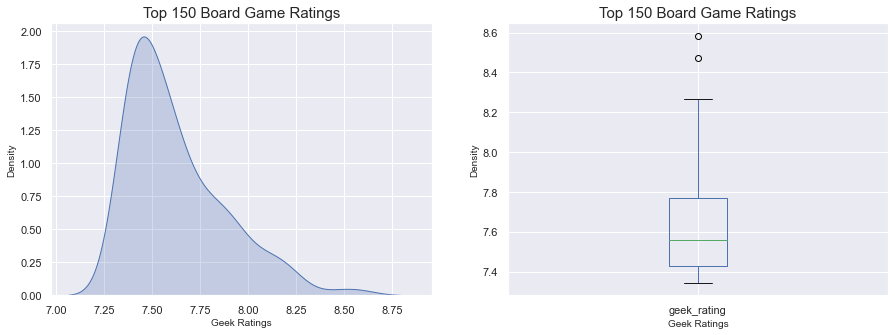

In [17]:
plt.figure(2)
plt.subplot(121)
sns.kdeplot(rating_views_top['geek_rating'], shade = True).set_title('Top 150 Board Game Ratings', fontsize = 15)
plt.xlabel('Geek Ratings', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.subplot(122)
rating_views_top['geek_rating'].plot.box(figsize=(15,5)).set_title('Top 150 Board Game Ratings', fontsize = 15)
plt.xlabel('Geek Ratings', fontsize = 10)
plt.ylabel('Density', fontsize = 10)

Text(0.5, 1.0, 'Top 150: site views vs. geek ratings')

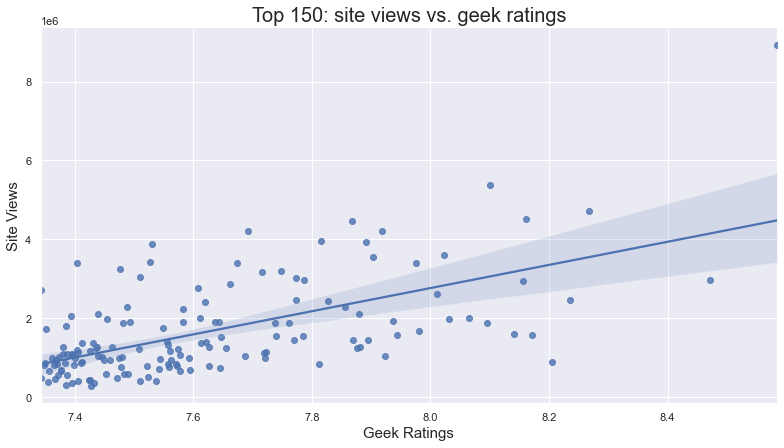

In [18]:
sns.lmplot("geek_rating", "siteviews", rating_views_top, height=6, aspect=1.8)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Top 150: site views vs. geek ratings', fontsize = 20)

### Evaluation of 150 lowest rated boardgames and site views:

- Bottom 150 boardgames siteviews are compared with their board game ratings

In [19]:
rating_views_bottom = brdg_df[['name','geek_rating',"siteviews"]]\
        .sort_values('geek_rating',ascending=False)\
        .loc[brdg_df.geek_rating > 0,:].tail(150)
rating_views_bottom

,name,geek_rating,siteviews
18261,Go To The Top Of The Class,5.33274,67126
18262,Feed the Kitty,5.33239,27893
18263,Pass the Pigs,5.33201,248338
18264,Fallen City of Karez,5.33149,140708
18265,Trivial Pursuit 20th Anniversary Edition,5.33024,66814
...,...,...,...
18406,War,3.98527,53095
18407,Bingo,3.89746,45273
18408,Candy Land The Disney Theme Park Edition,3.77222,285110
18409,Chutes and Ladders,3.58867,226580


In [20]:
rating_views_bottom.describe()

,geek_rating,siteviews
count,150.000000,1.500000e+02
mean,5.077048,1.399950e+05
std,0.349820,4.432717e+05
min,3.506730,8.410000e+03
25%,5.004008,4.027025e+04
50%,5.219855,6.750250e+04
75%,5.296655,1.199375e+05
max,5.332740,5.349478e+06


In [21]:
rating_views_bottom.corr()

,geek_rating,siteviews
geek_rating,1.000000,-0.252535
siteviews,-0.252535,1.000000


Text(0.5, 1.0, 'Bottom 100 Board Game Ratings')

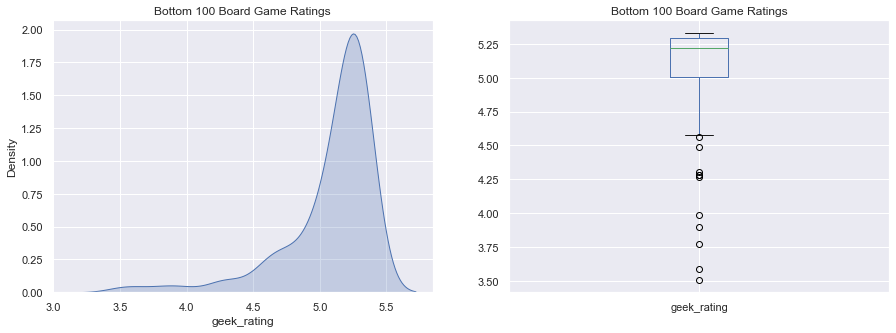

In [22]:
plt.figure(2)
plt.subplot(121)
sns.kdeplot(rating_views_bottom['geek_rating'], shade = True).set_title('Bottom 100 Board Game Ratings')
plt.subplot(122)
rating_views_bottom['geek_rating'].plot.box(figsize=(15,5)).set_title('Bottom 100 Board Game Ratings')

Text(0.5, 1.0, 'Bottom 100: site views vs. geek ratings')

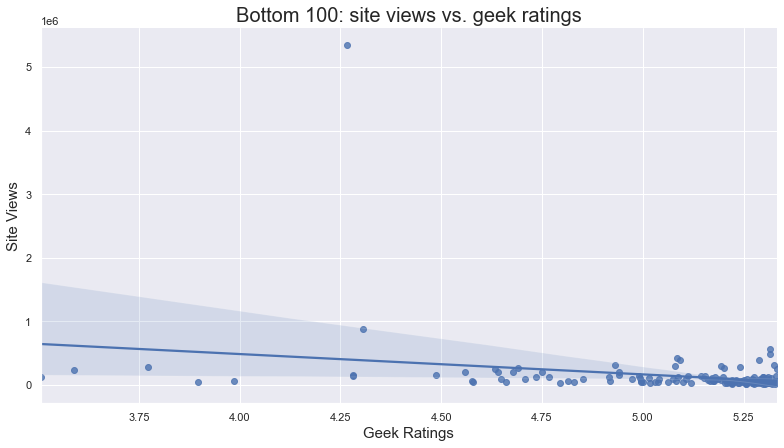

In [23]:
sns.lmplot("geek_rating", "siteviews", rating_views_bottom, height=6, aspect=1.8)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Bottom 100: site views vs. geek ratings', fontsize = 20)

Text(0.5, 1.0, 'Trend depicting site views and geek ratings')

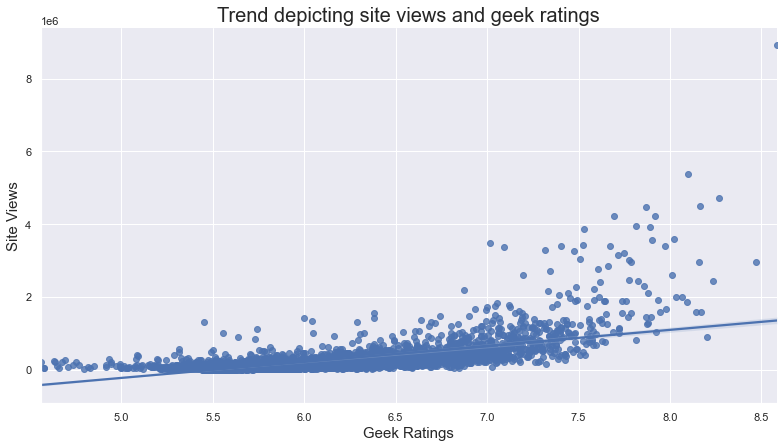

In [24]:
sns.lmplot("geek_rating", "siteviews", brdg_df.loc[brdg_df.geek_rating > 4.5,:], height=6, aspect=1.8)
plt.xlabel('Geek Ratings', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Trend depicting site views and geek ratings', fontsize = 20)

###########################################################################################################################

## Evaluating geek ratings vs game awards:

In [25]:
honor_df = brdg_df[['name','geek_rating','geek_rating_category',"award_counts"]]\
                .sort_values('geek_rating',ascending=False)\
                .loc[(brdg_df.geek_rating > 0) & (brdg_df.award_counts > 0)]

In [26]:
honor_df.describe()

,geek_rating,award_counts
count,3498.000000,3498.000000
mean,6.050853,2.485992
std,0.595030,3.117094
min,4.931720,1.000000
25%,5.569840,1.000000
50%,5.818320,1.000000
75%,6.407077,3.000000
max,8.584240,50.000000


In [27]:
honor_df.corr()

,geek_rating,award_counts
geek_rating,1.000000,0.566378
award_counts,0.566378,1.000000


### Number of awards for top and bottom 20:

In [28]:
top_20 = honor_df.head(20)

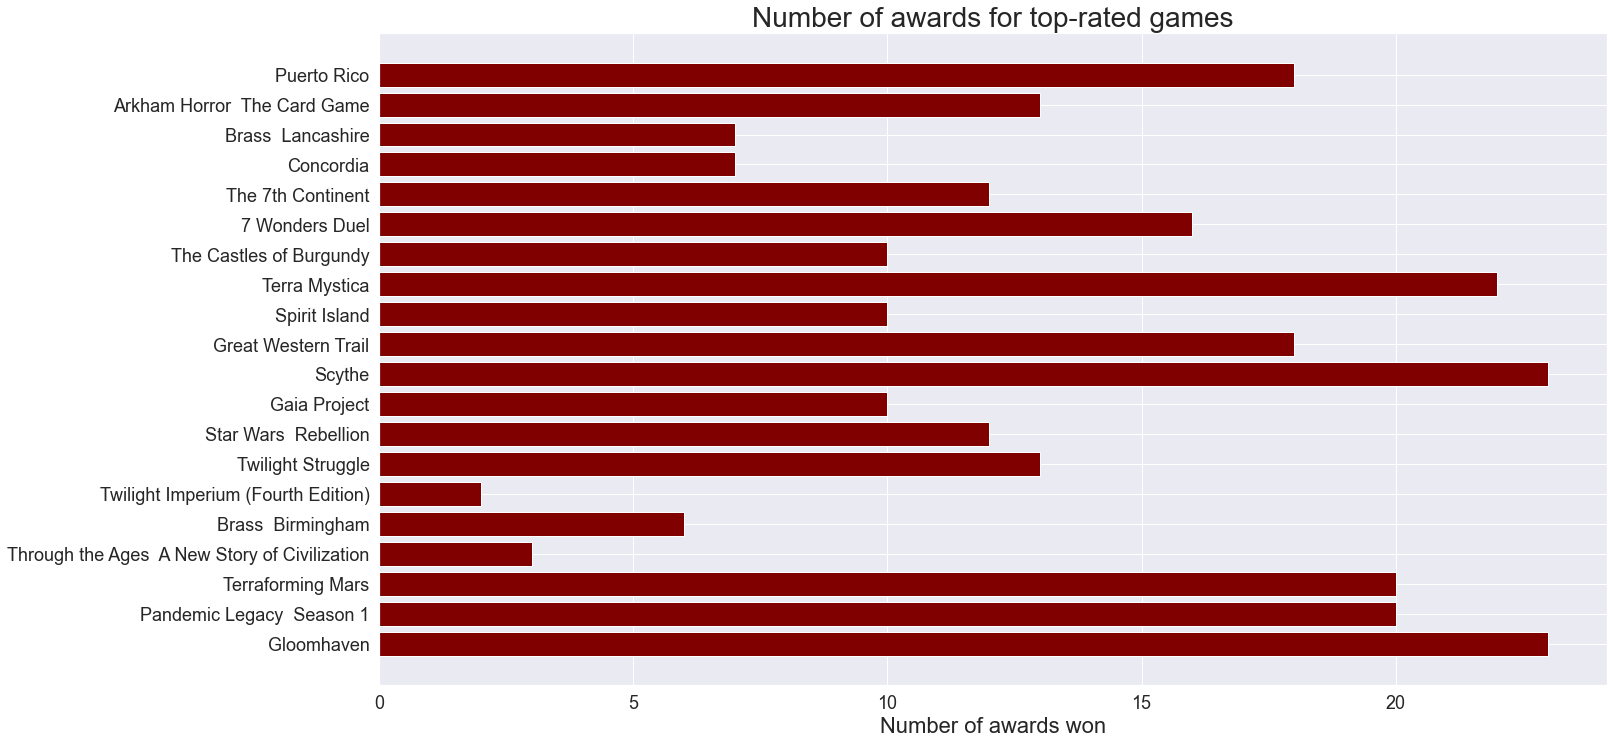

In [29]:
plt.figure(figsize = (22,12))
plt.barh(top_20.name, top_20.award_counts, color ='maroon')
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [30]:
bottom_20 = honor_df.tail(20)

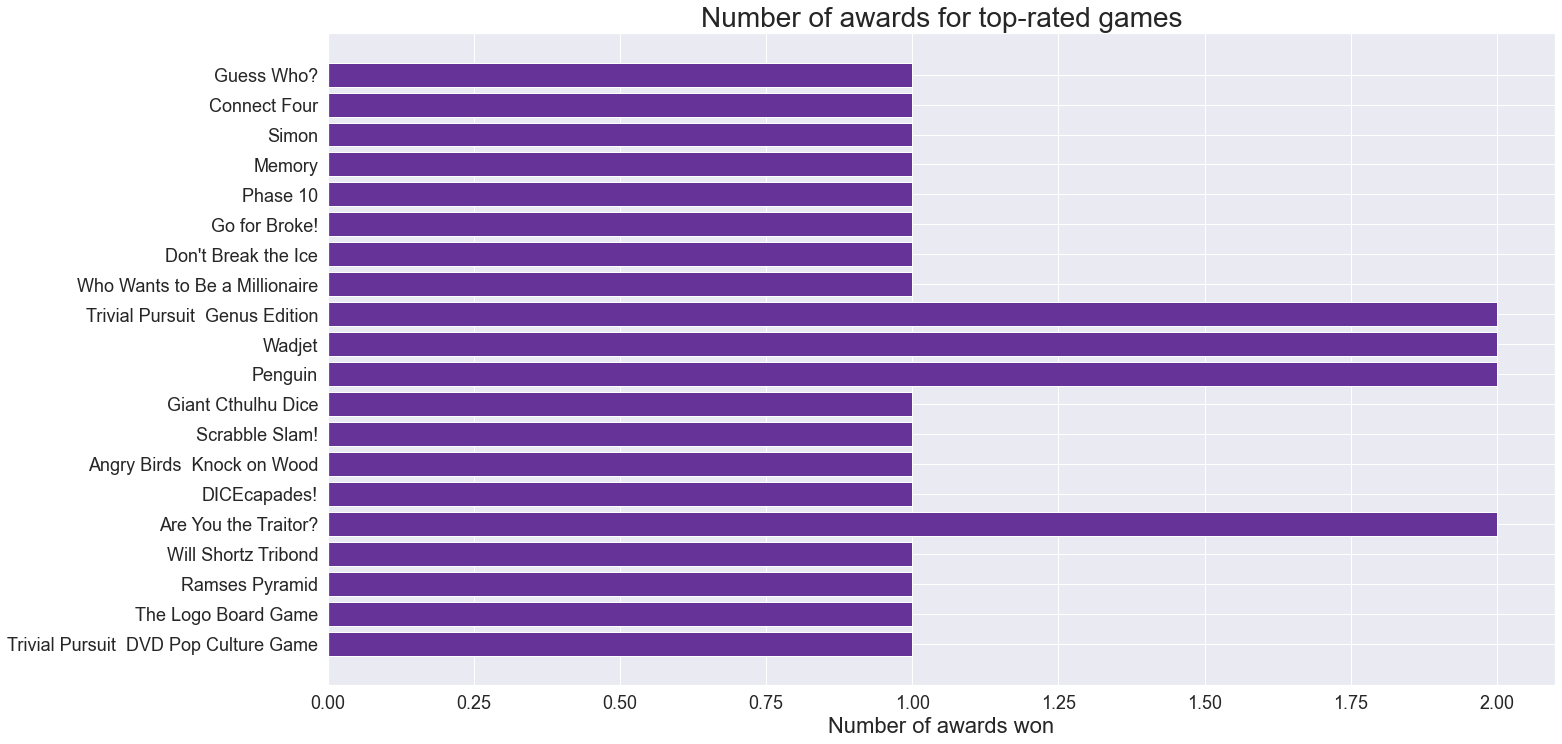

In [31]:
plt.figure(figsize = (22,12))
plt.barh(bottom_20.name, bottom_20.award_counts, color ='rebeccapurple')
plt.xlabel("Number of awards won", fontsize = 22)
plt.title("Number of awards for top-rated games", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

### Plotting average award counts for each category :

In [32]:
df_1 = pd.DataFrame(honor_df.groupby('geek_rating_category')['award_counts'].mean()).reset_index()
df_1

,geek_rating_category,award_counts
0,Geek rating < 5,1.000000
1,Geek rating > 5 and < 6,1.506737
2,Geek rating > 6 and < 7,2.837764
3,Geek_Rating > 7,7.564417


Text(0.5, 1.0, 'Average award counts for different rating categories')

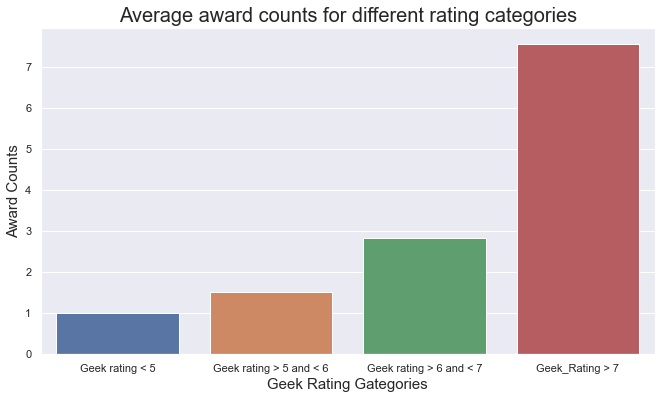

In [33]:
ax = sns.barplot(x = "geek_rating_category", y = "award_counts", data = df_1, errwidth=0)
plt.xlabel('Geek Rating Gategories', fontsize = 15)
plt.ylabel('Award Counts', fontsize = 15)
plt.title('Average award counts for different rating categories', fontsize = 20)

In [34]:
# rating_awards_top = honor_df[["geek_rating","geek_rating_category","award_counts"]].head(500)
# rating_awards_top

In [35]:
# sns.lmplot("geek_rating", "award_counts", rating_awards_top, hue= "geek_rating_category", height=6, aspect=1.8)
# plt.xlabel('Geek Ratings', fontsize = 15)
# plt.ylabel('Award Counts', fontsize = 15)
# plt.title('Top 150: award counts vs. geek ratings', fontsize = 20)

In [36]:
# rating_awards_top.corr()

In [37]:
# rating_awards_bottom = honor_df[['geek_rating',"geek_rating_category","award_counts"]].tail(500)
# rating_awards_bottom

In [38]:
# sns.lmplot("geek_rating", "award_counts", rating_awards_bottom, hue= "geek_rating_category", height=6, aspect=1.8)
# plt.xlabel('Geek Ratings', fontsize = 15)
# plt.ylabel('Award Counts', fontsize = 15)
# plt.title('Bottom 150: award counts vs. geek ratings', fontsize = 20)

In [39]:
# rating_awards_bottom.corr()

In [40]:
# sns.lmplot("geek_rating", "award_counts", honor_df, height=6, aspect=1.8)
# plt.xlabel('Geek Ratings', fontsize = 15)
# plt.ylabel('Award Counts', fontsize = 15)
# plt.title('Trend depicting award counts and geek ratings', fontsize = 20)

###########################################################################################################################

## Evaluating geek ratings vs game awards:

Text(0.5, 1.0, 'Game Site Views')

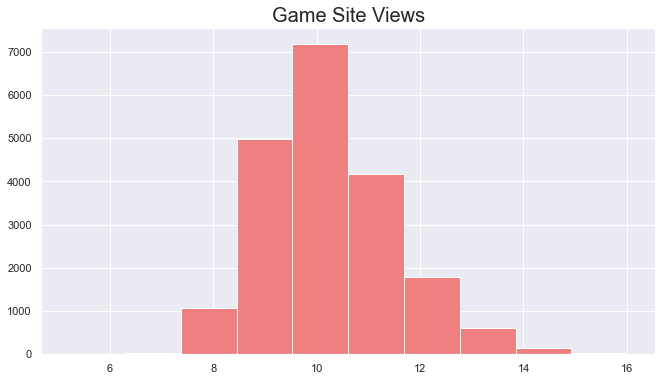

In [41]:
plt.hist(np.log(brdg_df['siteviews']), color = "lightcoral")
plt.title('Game Site Views', fontsize = 20)

In [42]:
df_2 = pd.DataFrame(brdg_df.groupby('geek_rating_category')["siteviews"].median()).reset_index()
df_2

,geek_rating_category,siteviews
0,Geek rating < 5,6863.5
1,Geek rating > 5 and < 6,21989.0
2,Geek rating > 6 and < 7,190586.0
3,Geek_Rating > 7,863421.0


Text(0.5, 1.0, 'Median of site views for different rating categories')

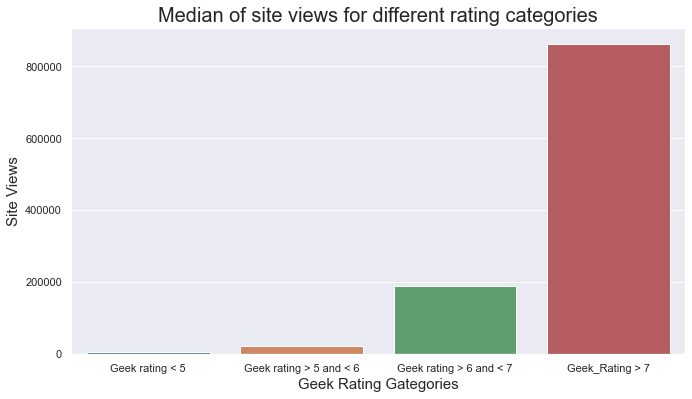

In [43]:
ax = sns.barplot(x = "geek_rating_category", y = "siteviews", data = df_2, errwidth=0)
plt.xlabel('Geek Rating Gategories', fontsize = 15)
plt.ylabel('Site Views', fontsize = 15)
plt.title('Median of site views for different rating categories', fontsize = 20)

In [44]:
media_df = brdg_df[["geek_rating","geek_rating_category","siteviews","podcast","weblink"]]\
                   .loc[brdg_df.geek_rating > 0,:]\
                   .loc[brdg_df.siteviews < 6.0e+6,:]\
                   .loc[((brdg_df.podcast > 0) & (brdg_df.podcast < 500)) & (brdg_df.weblink > 0)]

In [45]:
media_df

,geek_rating,geek_rating_category,siteviews,podcast,weblink
1,8.47159,Geek_Rating > 7,2971746,164,69
2,8.26781,Geek_Rating > 7,4724387,148,60
3,8.23513,Geek_Rating > 7,2448074,42,30
4,8.20459,Geek_Rating > 7,894621,21,13
5,8.17076,Geek_Rating > 7,1573904,44,20
...,...,...,...,...,...
19140,5.86353,Geek rating > 5 and < 6,71029,1,4
19141,5.73489,Geek rating > 5 and < 6,62725,1,3
19429,6.17089,Geek rating > 6 and < 7,112729,1,12
19585,5.59398,Geek rating > 5 and < 6,31075,1,3


In [46]:
media_df[["siteviews","podcast","weblink"]].corr()

,siteviews,podcast,weblink
siteviews,1.000000,0.786209,0.683638
podcast,0.786209,1.000000,0.618982
weblink,0.683638,0.618982,1.000000


Text(0.5, 1.0, 'Podcast Counts vs. Site Views')

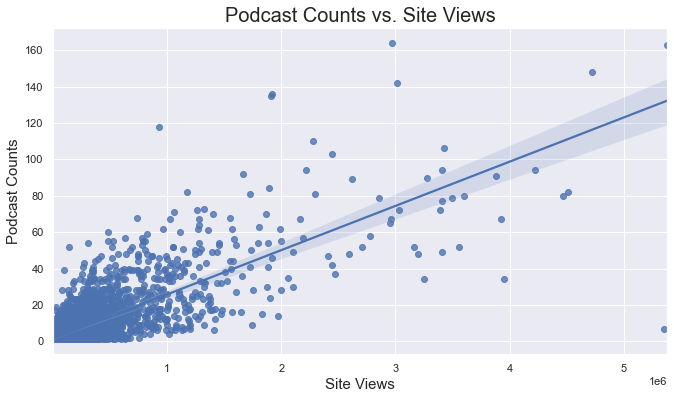

In [47]:
sns.regplot(x=media_df["siteviews"], y=media_df["podcast"])
plt.xlabel('Site Views', fontsize = 15)
plt.ylabel('Podcast Counts', fontsize = 15)
plt.title('Podcast Counts vs. Site Views', fontsize = 20)

Text(0.5, 1.0, 'Weblink Counts vs. Site Views')

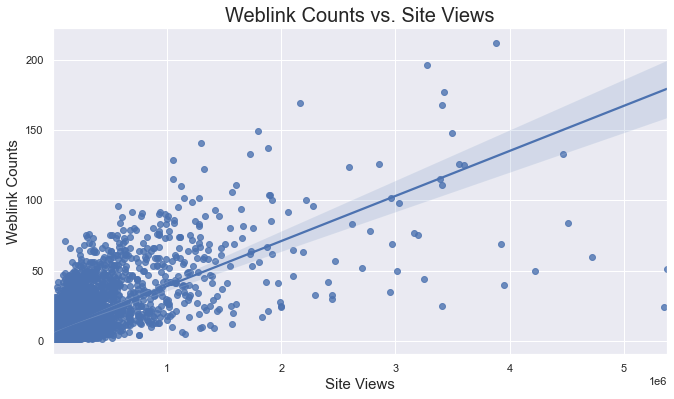

In [48]:
sns.regplot(x=media_df["siteviews"], y=media_df["weblink"])
plt.xlabel('Site Views', fontsize = 15)
plt.ylabel('Weblink Counts', fontsize = 15)
plt.title('Weblink Counts vs. Site Views', fontsize = 20)

In [49]:
bgg_site_df = brdg_df[["geek_rating","geek_rating_category","siteviews","BGG_news","BGG_blogs"]]\
                    .loc[brdg_df.geek_rating > 0,:]\
                    .loc[brdg_df.siteviews < 6.0e+6,:]\
                    .loc[(brdg_df.BGG_news > 0) & (brdg_df.BGG_blogs > 0)]

In [50]:
bgg_site_df

,geek_rating,geek_rating_category,siteviews,BGG_news,BGG_blogs
1,8.47159,Geek_Rating > 7,2971746,9,597
2,8.26781,Geek_Rating > 7,4724387,14,1158
3,8.23513,Geek_Rating > 7,2448074,5,185
4,8.20459,Geek_Rating > 7,894621,3,124
5,8.17076,Geek_Rating > 7,1573904,2,67
...,...,...,...,...,...
19105,5.88896,Geek rating > 5 and < 6,34325,1,2
19140,5.86353,Geek rating > 5 and < 6,71029,1,1
19141,5.73489,Geek rating > 5 and < 6,62725,2,1
19424,5.53021,Geek rating > 5 and < 6,14565,1,3


In [51]:
bgg_site_df[["siteviews","BGG_news","BGG_blogs"]].corr()

,siteviews,BGG_news,BGG_blogs
siteviews,1.000000,0.509123,0.805586
BGG_news,0.509123,1.000000,0.635450
BGG_blogs,0.805586,0.635450,1.000000


Text(0.5, 1.0, 'BGG news articles vs. Site Views')

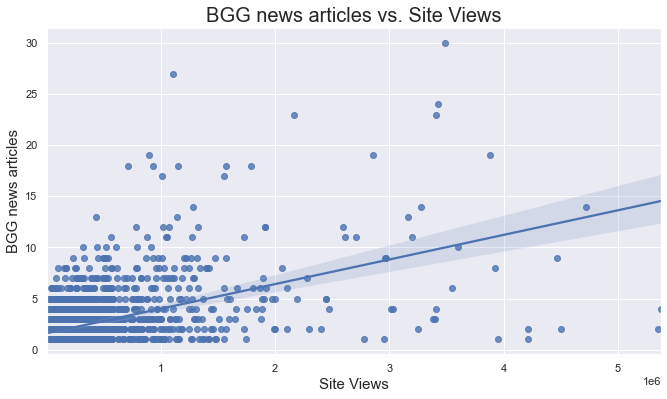

In [52]:
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_news"])
plt.xlabel('Site Views', fontsize = 15)
plt.ylabel('BGG news articles', fontsize = 15)
plt.title('BGG news articles vs. Site Views', fontsize = 20)

Text(0.5, 1.0, 'BGG blog posts vs. Site Views')

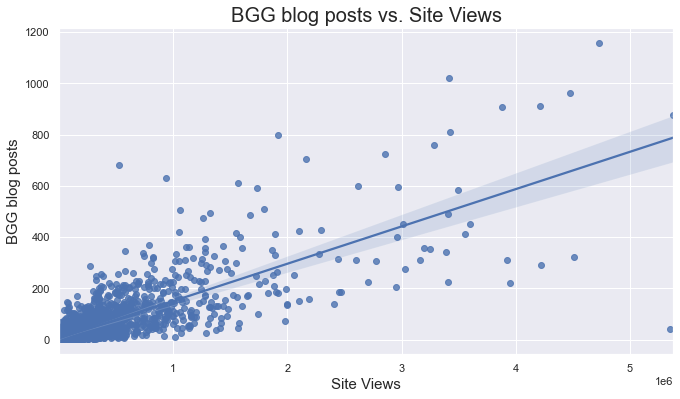

In [53]:
sns.regplot(x=bgg_site_df["siteviews"], y=bgg_site_df["BGG_blogs"])
plt.xlabel('Site Views', fontsize = 15)
plt.ylabel('BGG blog posts', fontsize = 15)
plt.title('BGG blog posts vs. Site Views', fontsize = 20)

###########################################################################################################################